# House Loan Data Analysis
### DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Objective:** Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

**Domain:** Finance


In [1]:
# import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import svm 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2023-03-21 05:52:10.570846: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 05:52:10.694217: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-21 05:52:10.694239: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-21 05:52:11.497638: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# load the data by using pandas
# url = "https://www.dropbox.com/s/smt43gz12eijbo6/loan_data%20%281%29.csv?dl=1"
# data = pd.read_csv(url)
# OR
data = pd.read_csv("loan_data.csv")

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Checking for null values in the dataset
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
data.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

#### Print percentage of default to payer of the dataset for the TARGET column

In [9]:
# Calculate percentage of default to payer
def_cou = sum(data['TARGET'])
def_per = def_cou/len(data)*100
pay_per = 100 - def_per
print('Percentage of Default : {:.2f} %'.format(def_per))
print('Percentage of Payer : {:.2f} %'.format(pay_per))

Percentage of Default : 8.07 %
Percentage of Payer : 91.93 %


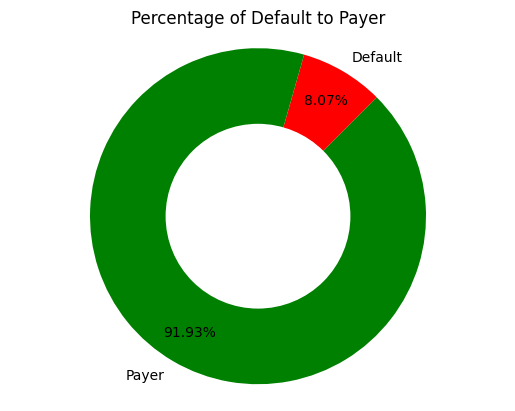

In [10]:
# Plot the data
labels = ['Default','Payer']
sizes = [def_cou, (len(data) - def_cou)]
colors = ['red', 'green']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=45, pctdistance=0.80)
ax.axis('equal')
centre_circle = plt.Circle((0.0,0.0),0.55,fc='white')
fig.gca().add_artist(centre_circle)
plt.title("Percentage of Default to Payer")
plt.show()

#### Balance the dataset if the data is imbalanced
#### Plot the balanced data or imbalanced data

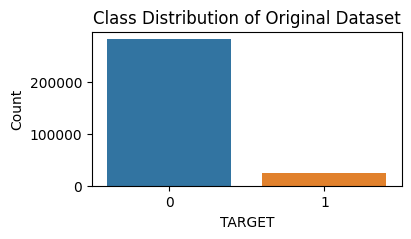

In [11]:
# Plot the class distribution of the original dataset
plt.figure(figsize=(4,2))
sns.countplot(x='TARGET',data=data)
plt.title('Class Distribution of Original Dataset')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

In [12]:
# Balance the dataset using RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(data.drop('TARGET', axis=1), data['TARGET'])
data_resample = pd.concat([X_resampled, y_resampled], axis=1)

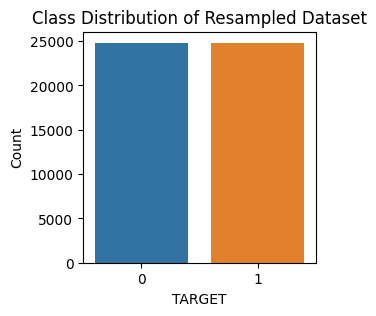

In [13]:
# Plot the class distribution of the resampled data
plt.figure(figsize=(3, 3))
sns.countplot(x='TARGET',data=data_resample)
plt.title('Class Distribution of Resampled Dataset')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

#### Encode the columns that is required for the model

In [14]:
# # select categorical columns
# cat_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE']
# # encode categorical columns using LabelEncoder
# le = LabelEncoder()
# for col in cat_cols:
#     data[col] = le.fit_transform(data[col])
# Perform one-hot encoding on the 'NAME_EDUCATION_TYPE' column
# data = pd.get_dummies(data, columns=['NAME_EDUCATION_TYPE'])

In [15]:
house_loan= data.sample(frac=1,random_state=5)

In [16]:
ordenc=OrdinalEncoder()

In [17]:
house_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(house_loan[['NAME_CONTRACT_TYPE']])
house_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(10)

,NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE_CODE
204283,Revolving loans,1.0
122067,Cash loans,0.0
25305,Cash loans,0.0
40338,Cash loans,0.0
142639,Cash loans,0.0
88946,Revolving loans,1.0
172666,Cash loans,0.0
226134,Cash loans,0.0
229734,Revolving loans,1.0
66424,Cash loans,0.0


In [18]:
house_loan['NAME_CONTRACT_TYPE_CODE'].value_counts()

0.0    278232
1.0     29279
Name: NAME_CONTRACT_TYPE_CODE, dtype: int64

In [19]:
house_loan['CODE_GENDER_CODE']=ordenc.fit_transform(house_loan[['CODE_GENDER']])

In [20]:
house_loan['CODE_GENDER_CODE'].value_counts()

0.0    202448
1.0    105059
2.0         4
Name: CODE_GENDER_CODE, dtype: int64

In [21]:
house_loan['FLAG_OWN_CAR_CODE']= ordenc.fit_transform(house_loan[['FLAG_OWN_CAR']])
house_loan['FLAG_OWN_CAR_CODE'].value_counts()

0.0    202924
1.0    104587
Name: FLAG_OWN_CAR_CODE, dtype: int64

In [22]:
house_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(house_loan[['CNT_CHILDREN']])
house_loan['CNT_CHILDREN_CODE'].value_counts()

0.0     215371
1.0      61119
2.0      26749
3.0       3717
4.0        429
5.0         84
6.0         21
7.0          7
13.0         3
14.0         2
9.0          2
12.0         2
8.0          2
10.0         2
11.0         1
Name: CNT_CHILDREN_CODE, dtype: int64

In [23]:
house_loan=house_loan.sample(frac=1,random_state=45)

In [24]:
house_loan['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [25]:
y=house_loan.TARGET

In [26]:
house_loan_featu=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']

In [27]:
X=house_loan[house_loan_featu]

In [28]:
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 307511

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)


In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((206032, 2), (101479, 2), (206032,), (101479,))

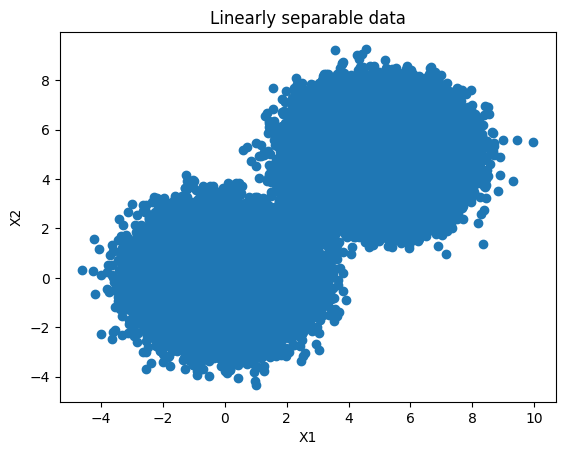

In [30]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [31]:
# Concatenate encoded columns with numerical columns
from sklearn.preprocessing import OneHotEncoder
cat_cols = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY"]
encoder = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(house_loan[cat_cols]))
# encoded_cols.columns = encoder.get_feature_names(cat_cols)
data_encoded = pd.concat([house_loan.drop(columns=cat_cols), encoded_cols], axis=1)

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(house_loan.drop(columns=["TARGET"]), house_loan["TARGET"], test_size=0.2, random_state=42)

In [33]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

In [34]:
# Calculate confusion matrix and sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
print("Sensitivity: {:.2f}".format(sensitivity))

Sensitivity: 1.00


Confusion Matrix:
 [[50909    12]
 [    8 50550]]


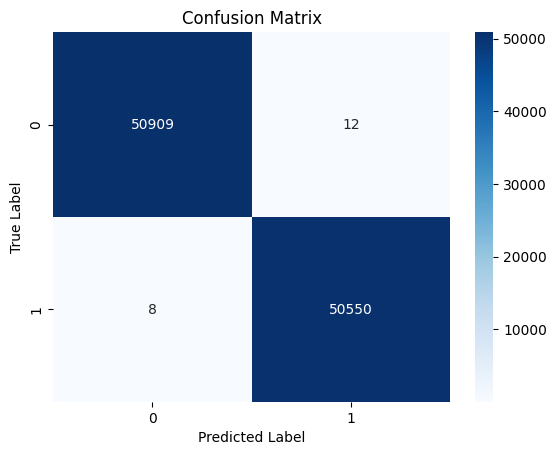

Sensitivity: 1.00


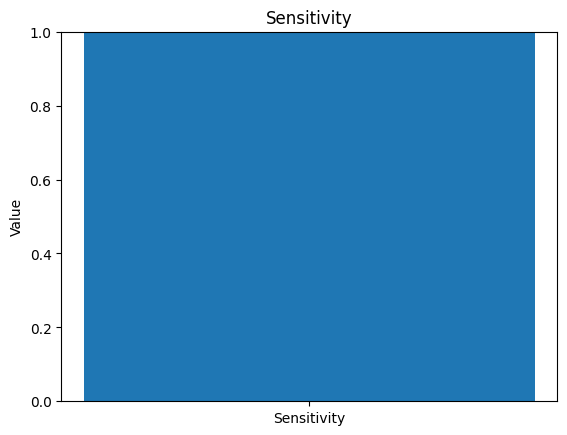

In [35]:
# Step 7: Calculate confusion matrix and sensitivity
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
import seaborn as sns

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate sensitivity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print("Sensitivity: {:.2f}".format(sensitivity))

# Plot sensitivity graph
fig, ax = plt.subplots()
ax.bar(["Sensitivity"], [sensitivity])
ax.set_ylim(0, 1)
ax.set_title("Sensitivity")
ax.set_ylabel("Value")
plt.show()


Area under ROC curve: 1.00


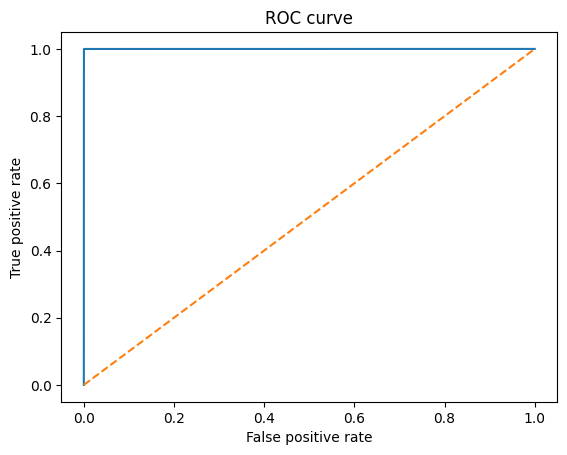

In [36]:
# Step 8: Calculate area under receiver operating characteristics curve
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("Area under ROC curve: {:.2f}".format(auc))

# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], linestyle="--")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve")

plt.show()
